In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Define the path to your CSV files
sales_fact = pd.read_csv('sales_fact.csv')
branch_dim = pd.read_csv('branch_dim.csv')
customer_dim = pd.read_csv('customer_dim.csv')
producrtdim = pd.read_csv('producrtdim.csv')
sales_persondim = pd.read_csv('sales_persondim.csv')
time_dimension = pd.read_csv('time_dimension.csv')

# Display the first few rows of the sales_fact table
sales_fact.head()

,fact_id,branch_id,time_id,product_id,customer_id,salesperson_id,total_sales,quantity_sold,discount_given,sales_target_achieved,profit_margin
0,1,4,193,58,68,51,895,91,10,False,48
1,2,46,301,76,343,68,781,73,22,True,58
2,3,17,60,13,256,54,538,76,2,True,417
3,4,47,332,55,180,93,133,90,10,True,342
4,5,12,264,125,200,8,313,17,1,False,358


C:\Users\Ziad\AppData\Local\Temp\ipykernel_7880\578311130.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='product_id', y='total_sales', palette='viridis')


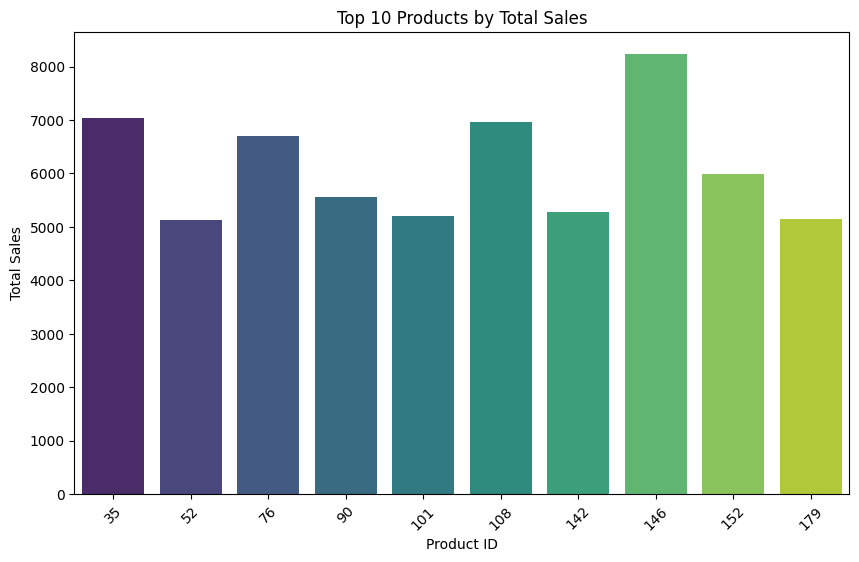

C:\Users\Ziad\AppData\Local\Temp\ipykernel_7880\578311130.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_salespeople, x='salesperson_id', y='quantity_sold', palette='coolwarm')


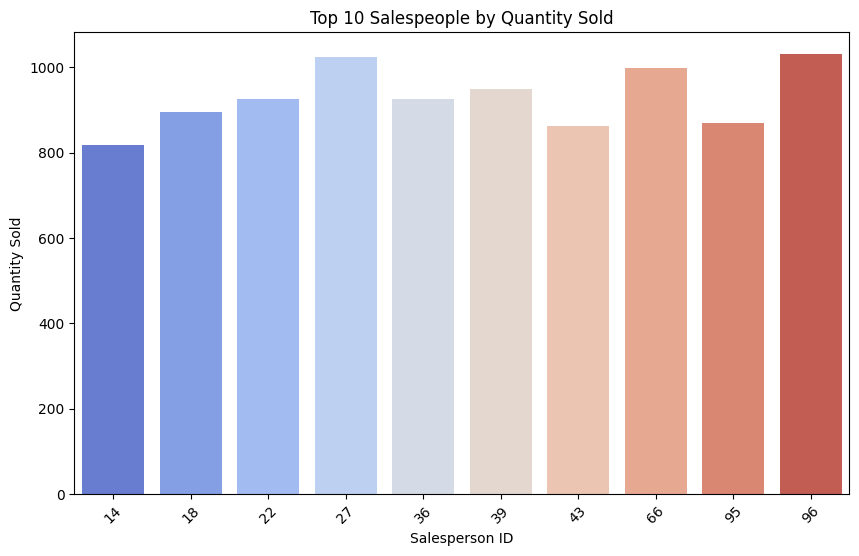

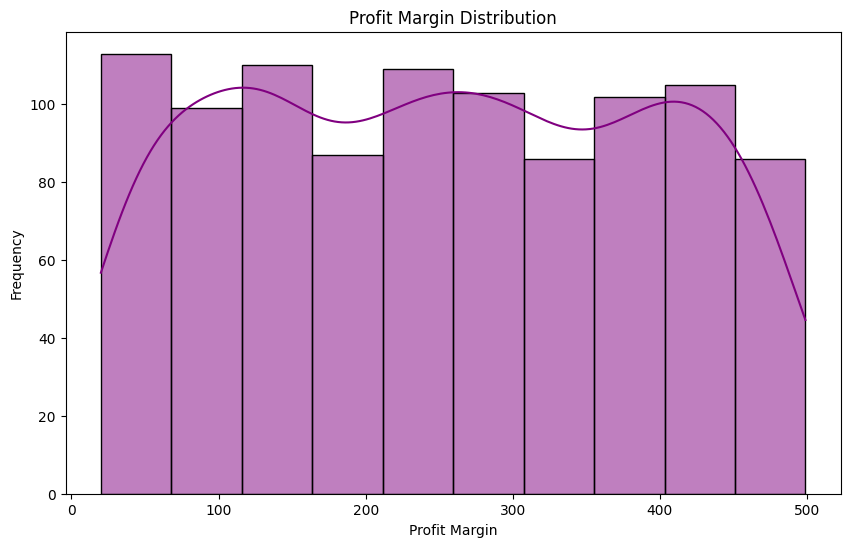

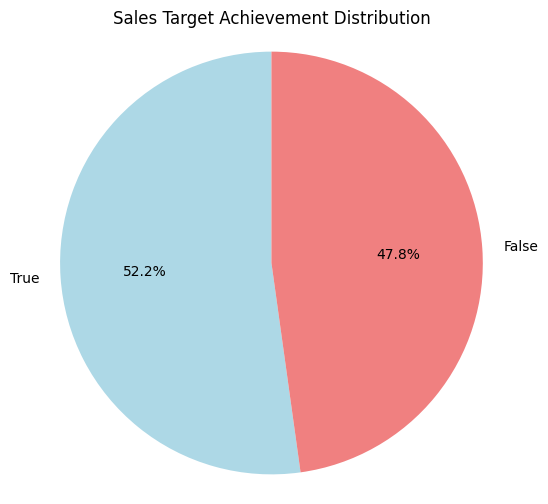

C:\Users\Ziad\AppData\Local\Temp\ipykernel_7880\578311130.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_branches, x='branch_id', y='total_sales', palette='Set2')


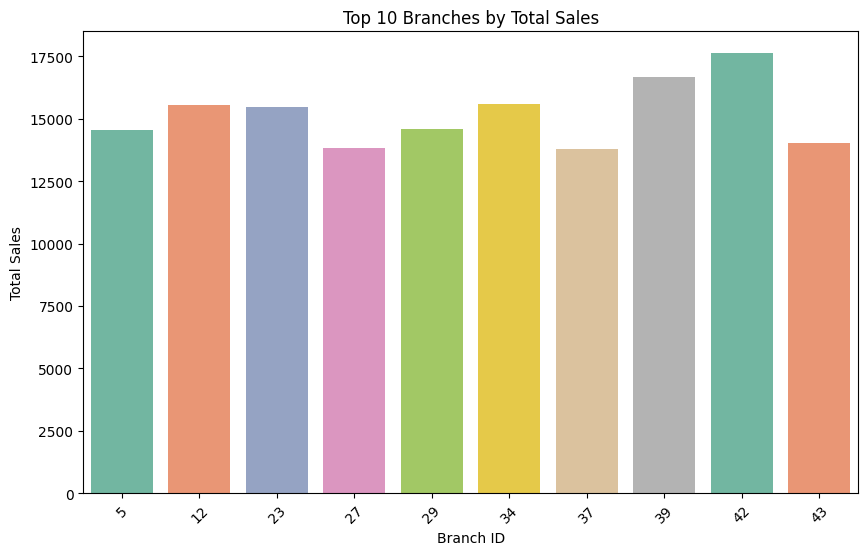

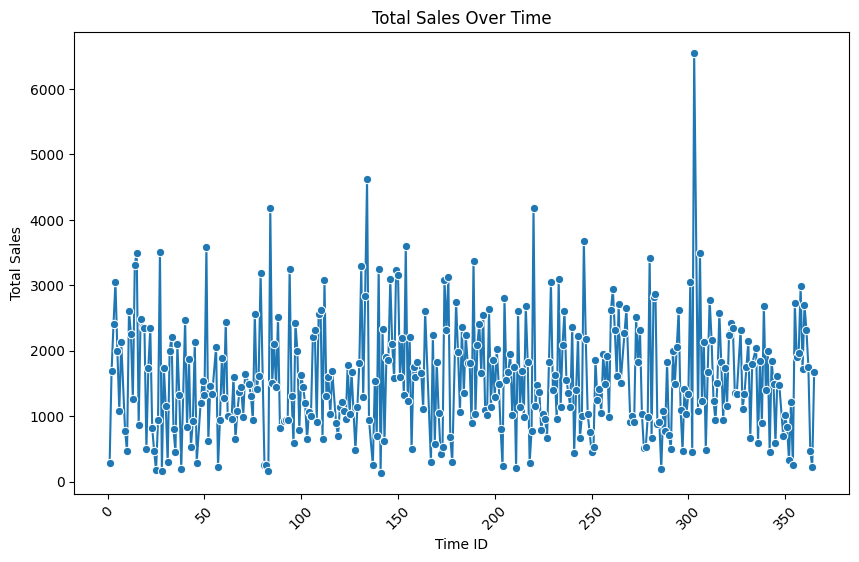

C:\Users\Ziad\AppData\Local\Temp\ipykernel_7880\578311130.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_discount_products, x='product_id', y='discount_given', palette='pastel')


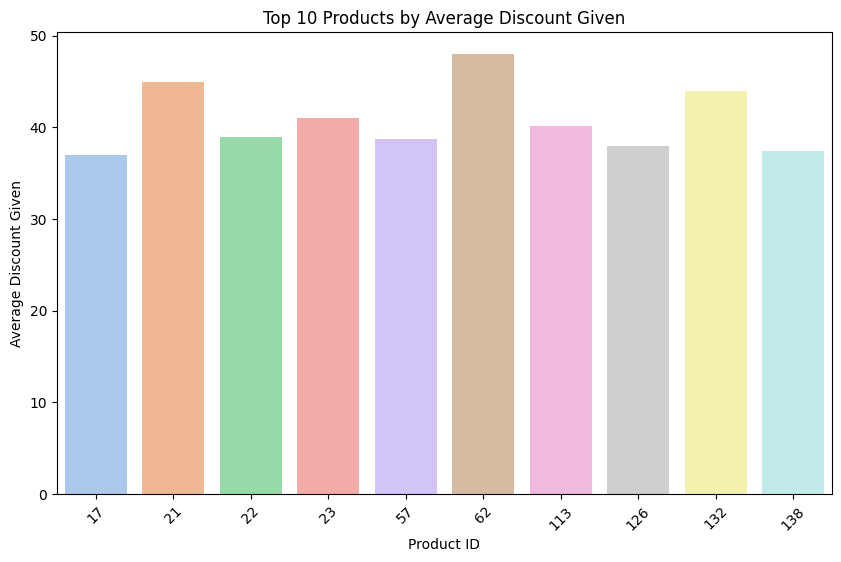

C:\Users\Ziad\AppData\Local\Temp\ipykernel_7880\578311130.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='customer_id', y='total_sales', palette='flare')


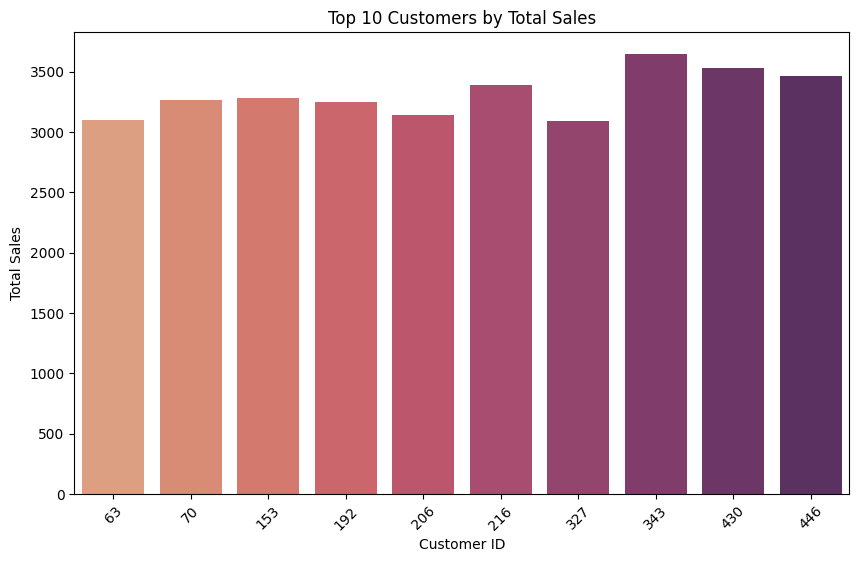

C:\Users\Ziad\AppData\Local\Temp\ipykernel_7880\578311130.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_profit_products, x='product_id', y='profit_margin', palette='cividis')


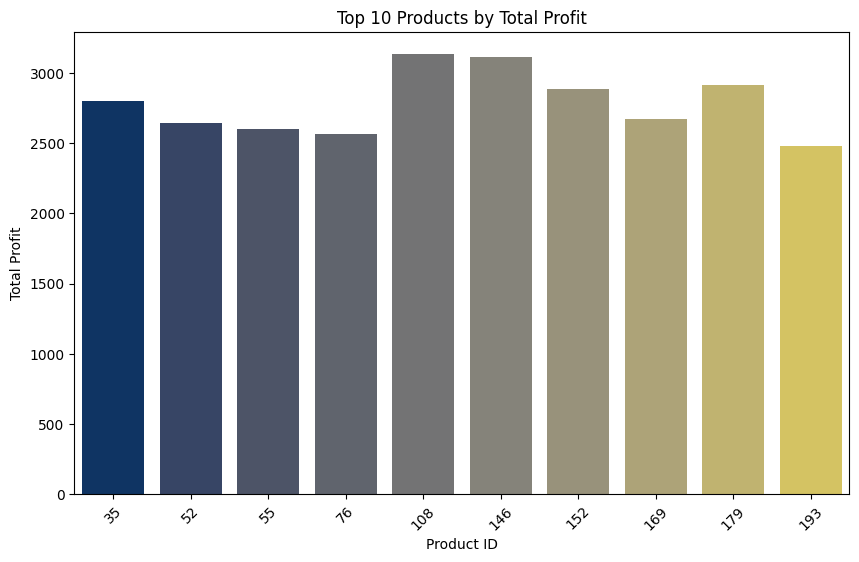

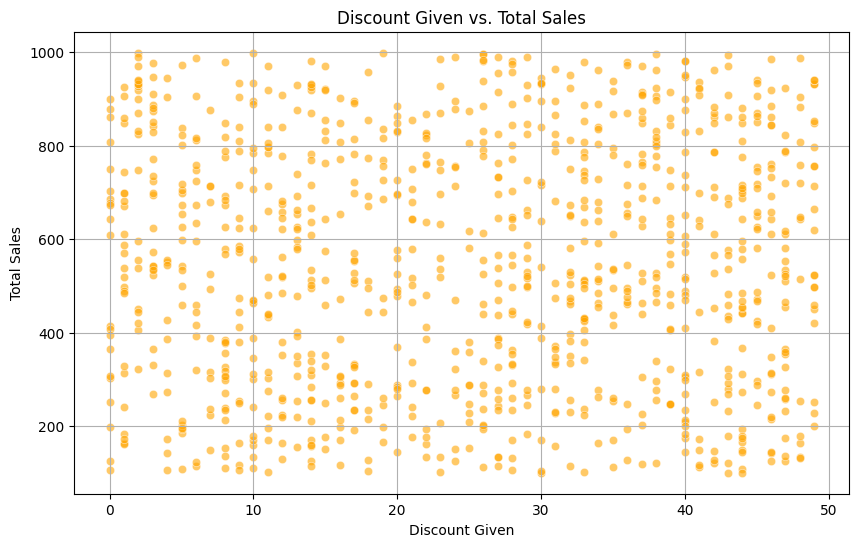

In [5]:
# 1. Total Sales by Product
# get the top 10 products with the highest total sales.

top_products = sales_fact.groupby('product_id')['total_sales'].sum().nlargest(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x='product_id', y='total_sales', palette='viridis')
plt.title('Top 10 Products by Total Sales')  # Set the title of the plot
plt.xlabel('Product ID')  # x-axis
plt.ylabel('Total Sales')  # y-axis
plt.xticks(rotation=45)  
plt.show()



# 2. Total Quantity Sold by Salesperson
#get the top 10 salespeople who sold the most quantity.

top_salespeople = sales_fact.groupby('salesperson_id')['quantity_sold'].sum().nlargest(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=top_salespeople, x='salesperson_id', y='quantity_sold', palette='coolwarm')
plt.title('Top 10 Salespeople by Quantity Sold')  
plt.xlabel('Salesperson ID')  # x-axis
plt.ylabel('Quantity Sold')  # y-axis
plt.xticks(rotation=45)  
plt.show()



# 3. Profit Margin Distribution
# Create a histogram to visualize the distribution of profit margins across all sales.
plt.figure(figsize=(10, 6))
sns.histplot(sales_fact['profit_margin'], bins=10, kde=True, color='purple')  
plt.title('Profit Margin Distribution')  
plt.xlabel('Profit Margin')  # x-axis
plt.ylabel('Frequency')      # y-axis
plt.show()



# 4. Sales Target Achievement
# Count how many sales targets were achieved and how many were not.
sales_target_achieved = sales_fact['sales_target_achieved'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sales_target_achieved, labels=sales_target_achieved.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Sales Target Achievement Distribution')  
plt.axis('equal')  
plt.show()



# 5. Total Sales by Branch
#get the top 10 branches with the highest total sales.
top_branches = sales_fact.groupby('branch_id')['total_sales'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_branches, x='branch_id', y='total_sales', palette='Set2')
plt.title('Top 10 Branches by Total Sales')  # Set the title of the plot
plt.xlabel('Branch ID')     #x-axis
plt.ylabel('Total Sales')   #y-axis
plt.xticks(rotation=45)  
plt.show()



# 6. Sales Distribution Over Time
# to observe sales trends over time.
time_sales = sales_fact.groupby('time_id')['total_sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=time_sales, x='time_id', y='total_sales', marker='o')
plt.title('Total Sales Over Time')  
plt.xlabel('Time ID')               #x-axis
plt.ylabel('Total Sales')           #y-axis
plt.xticks(rotation=45)  
plt.show()



# 7. Average Discount Given per Product
# get the top 10 products with the highest average discount.

top_discount_products = sales_fact.groupby('product_id')['discount_given'].mean().nlargest(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=top_discount_products, x='product_id', y='discount_given', palette='pastel')
plt.title('Top 10 Products by Average Discount Given')  
plt.xlabel('Product ID')  
plt.ylabel('Average Discount Given')  
plt.xticks(rotation=45)  
plt.show()



# 8. Total Sales by Customer
# get the top 10 customers with the highest total sales.

top_customers = sales_fact.groupby('customer_id')['total_sales'].sum().nlargest(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=top_customers, x='customer_id', y='total_sales', palette='flare')
plt.title('Top 10 Customers by Total Sales')  
plt.xlabel('Customer ID')  
plt.ylabel('Total Sales')  
plt.xticks(rotation=45)  
plt.show()




# 9. Total Profit by Product
# get the top 10 products with the highest total profit.

top_profit_products = sales_fact.groupby('product_id')['profit_margin'].sum().nlargest(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=top_profit_products, x='product_id', y='profit_margin', palette='cividis')
plt.title('Top 10 Products by Total Profit')  
plt.xlabel('Product ID')  
plt.ylabel('Total Profit')  
plt.xticks(rotation=45)  
plt.show()



# 10. Discount Given vs. Total Sales
# Create a scatter plot to visualize the relationship between discount given and total sales.

plt.figure(figsize=(10, 6))
sns.scatterplot(data=sales_fact, x='discount_given', y='total_sales', alpha=0.6, color='orange')
plt.title('Discount Given vs. Total Sales')  
plt.xlabel('Discount Given')  
plt.ylabel('Total Sales')  
plt.grid()  
plt.show()